In [48]:
import numpy as np
import matplotlib.pyplot as plt
from general_IO import read_column

## Utility functions

In [44]:
def ByteToMegaByte(_bytes):
    return _bytes / (1024*1024)

def NanoToMilli(_ns):
    return _ns / 1000000

## Config parameters

In [33]:
nbRepeats=100 #Number of time we run the writing process
nbRefs=[10, 100, 1000, 10000] #Number of objects for which we will override the translation, rotation, and scale.
nbBatch=[1, 2, 5, 10] #number of files in which the objects are going to be dispatched.
usdExtension = ["usda", "usdc"] #whether we use usda or usdc
totalBytesWritten=[3*3*4*_nbRefs for _nbRefs in nbRefs] #Size of the file in bytes

## Load all data 

In [38]:
dataFolder="./RuntimeResults"

allData = {}
allHeaders = {}

for _nbRefs in nbRefs:
    for _nbBatch in nbBatch:
        for _usdExtension in usdExtension:

            _totalBytesWritten=3*3*4*_nbRefs
            key=(_totalBytesWritten, _nbRefs, _nbBatch, _usdExtension)
            filename = "{}_bytes__for_{}_objects_in_{}_{}_files.csv".format(_totalBytesWritten, _nbRefs, _nbBatch, _usdExtension)

            #Read the data
            timingsSTR = read_column(dataFolder, filename, [1,2,3,4], ",")
            timingsHeaders = timingsNames=["UsdCreate", "Define World", "Add {} Refs to {} File(s)".format(_nbRefs, _nbBatch), "Save {} File".format(_nbBatch)]
            timingsSTRSplit = [timing.split() for timing in timingsSTR[1:]]
            timingsNs = np.array(timingsSTRSplit).astype(np.int64)

            #save the data
            allData[key] = timingsNs
            allHeaders[key] = timingsHeaders


## Show timings in milliseconds for each of the "4 parts" of the writing procedure
See the function WriteUSDStage in `./WriteUSDStageProfiling.py` for the "4 parts"

The following is a demonstration of what we will be ploting:

Average times in ms:[ 2.331434  2.449762  8.017154 10.483139]
Standard Deviation of the times in ms:[1.02052549 1.14549029 1.94084563 2.06716452]


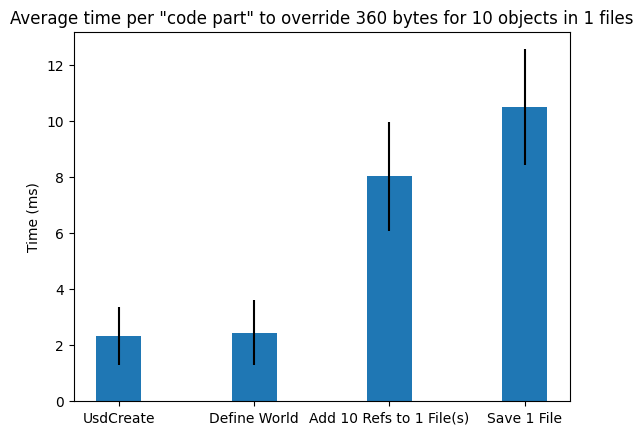

In [47]:
#Local variables to facilitate the access to the data
_nbRefs = nbRefs[0]
_nbBatch = nbBatch[0]
_usdExtension = usdExtension[0]
_totalBytesWritten = 3*3*4*_nbRefs
_key=(_totalBytesWritten, _nbRefs, _nbBatch, _usdExtension)

localTimingsNS = allData[_key]

#Use NanoToMilli to convert the timings from nanoseconds to milliseconds
locaTimingsMs= NanoToMilli(localTimingsNS)

averageTimingsMs = np.mean(locaTimingsMs, axis = 0)
print("Average times in ms:{}".format(averageTimingsMs))

stdTimingsMs = np.std(locaTimingsMs, axis = 0)
print("Standard Deviation of the times in ms:{}".format(stdTimingsMs))

title = "Average time per \"code part\" to override {} bytes for {} objects in {} files".format(_totalBytesWritten, _nbRefs, _nbBatch)

plt.bar(np.arange(4)*30, averageTimingsMs, 10, tick_label=allHeaders[_key], yerr = stdTimingsMs)
plt.ylabel("Time (ms)")
plt.title(title)
plt.show()

### Compare USDA and USDC files

[[array([ 2.331434,  2.449762,  8.017154, 10.483139]), array([ 4.409498,  4.616764, 10.67109 , 15.198134]), array([11.169968, 11.694872, 19.143235, 30.460513]), array([22.748726, 23.800821, 33.740856, 55.758551])], [array([ 3.495285,  3.62176 ,  9.402768, 14.481123]), array([ 7.082468,  7.341386, 13.930871, 25.111033]), array([17.760492, 18.407215, 26.825729, 56.209214]), array([35.120209, 36.425995, 47.438438, 98.873915])]]
0 [array([ 2.331434,  2.449762,  8.017154, 10.483139]), array([ 4.409498,  4.616764, 10.67109 , 15.198134]), array([11.169968, 11.694872, 19.143235, 30.460513]), array([22.748726, 23.800821, 33.740856, 55.758551])]


TypeError: only length-1 arrays can be converted to Python scalars

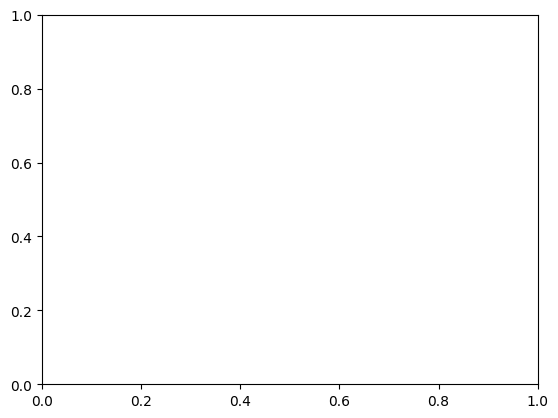

In [54]:
import matplotlib.pyplot as plt

# Set the nbRefs values
nbRefs_values = nbRefs

# Set the usdExtension values
usdExtension_values = usdExtension

# Loop through the nbRefs values
for _nbRefs in nbRefs:
    # Create a list to store the average timings for each usdExtension
    average_timings = []
    
    # Loop through the usdExtension values
    for _usdExtension in usdExtension:
        # Create a list to store the average timings for each nbBatch
        nbBatch_timings = []
        
        # Loop through the nbBatch values
        for _nbBatch in nbBatch:
            # Get the key for the current nbRefs value, usdExtension value, and nbBatch value
            key = (3*3*4*_nbRefs, _nbRefs, _nbBatch, _usdExtension)
            
            # Get the average timings in milliseconds for the current key
            timings_ms = NanoToMilli(allData[key])
            nbBatch_timings.append(np.mean(timings_ms, axis=0))
        
        average_timings.append(nbBatch_timings)
    
    # Set the x-axis labels
    x_labels = [f"usdExtension: {ext}" for ext in usdExtension_values]
    
    # Set the title for the bar plot
    title = f"Average timings for nbRefs: {_nbRefs}"
    print(average_timings)
    # Plot the bar chart
    for i, timings in enumerate(average_timings):
        print(i, timings)
        plt.bar(np.arange(len(timings)), timings, tick_labels=x_labels, label=f"nbBatch: {nbBatch[i]}")
    
    plt.xlabel("usdExtension")
    plt.ylabel("Time (ms)")
    plt.title(title)
    plt.legend()
    plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

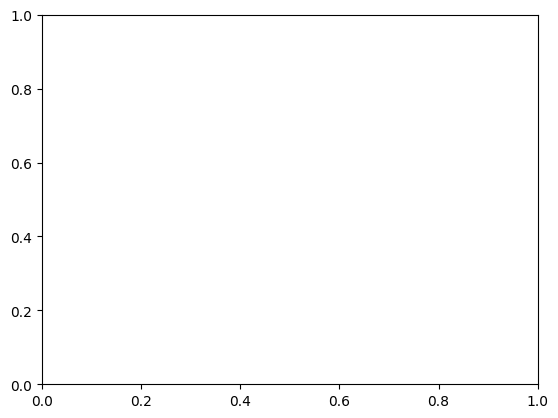

In [56]:
plt.bar([1,2], [[1,2], [4,5]])

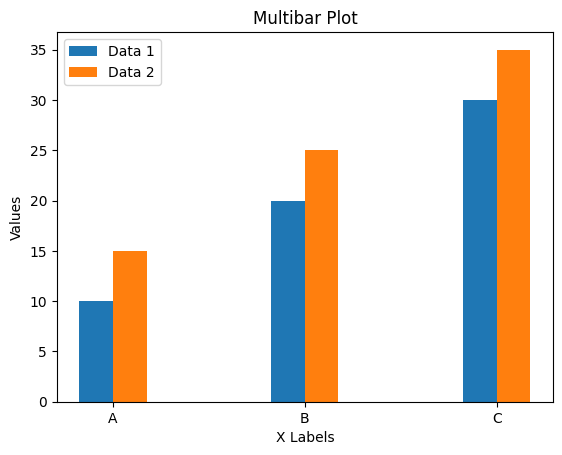

In [71]:
def plot_multibar(x_coordinates, x_labels, data_arrays):
    # Set the width of the bars
    bar_width = 0.35

    # Adjust the x-axis positions for the bars
    x_positions = np.array(x_coordinates) - bar_width/2
    x_positions_labels = np.zeros(len(x_coordinates))

    # Calculate the number of data arrays
    num_data_arrays = len(data_arrays)

    # Calculate the bar width for each data array
    bar_width_per_array = bar_width / num_data_arrays

    # Plotting
    for i, data_array in enumerate(data_arrays):
        # Adjust the x-axis positions for each data array
        x_positions_i = x_positions + i * bar_width_per_array
        x_positions_labels += x_positions_i/num_data_arrays
        # Plot the data array
        plt.bar(x_positions_i, data_array, width=bar_width_per_array, label=f'Data {i+1}')

    # Customize the plot
    plt.xlabel('X Labels')
    plt.ylabel('Values')
    plt.title('Multibar Plot')
    plt.legend()

    # Set the x tick labels
    plt.xticks(x_positions_labels, x_labels)

    # Show the plot
    plt.show()

# Sample data
x_coordinates = [1, 2, 3]
data1 = [10, 20, 30]
data2 = [15, 25, 35]
x_labels = ['A', 'B', 'C']

# Call the function
plot_multibar(x_coordinates, x_labels, [data1, data2])
